Performing EDA in Retail Store data.
The objective is to find areas of improvement to increse profits.
And identify business problems, and oppertunities.

In this project, we have retail store data, about its products

Let us load and take a look at the data.

In [89]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


sample = pd.read_csv("../input/sample-store-data/SampleSuperstore.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The data looks fine, let us do some data cleaning.

In [90]:
print(sample.shape)
print("\n")
print(sample.info())
print("\n")
print(sample.describe())
print("\n")
print(sample.isnull().sum())
print("\n")
print(sample.duplicated().sum())

(9994, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.3794

The data look good except some duplicates, we can just drop them.

In [91]:
sample.drop_duplicates(inplace=True)

sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

"Postal code" is not necessary for the analysis, thus we can remove it.

In [92]:
col = ['Postal Code']
sample1 = sample.drop(columns=col,axis=1)

sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [93]:
print(sample1.cov())
print("\n")

sample1.head()

                  Sales    Quantity   Discount        Profit
Sales     389028.396022  278.765576  -3.645637  70057.067126
Quantity     278.765576    4.958001   0.003990     34.565743
Discount      -3.645637    0.003990   0.042624    -10.632751
Profit     70057.067126   34.565743 -10.632751  54970.478824




,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Data visualization of various categories of goods.

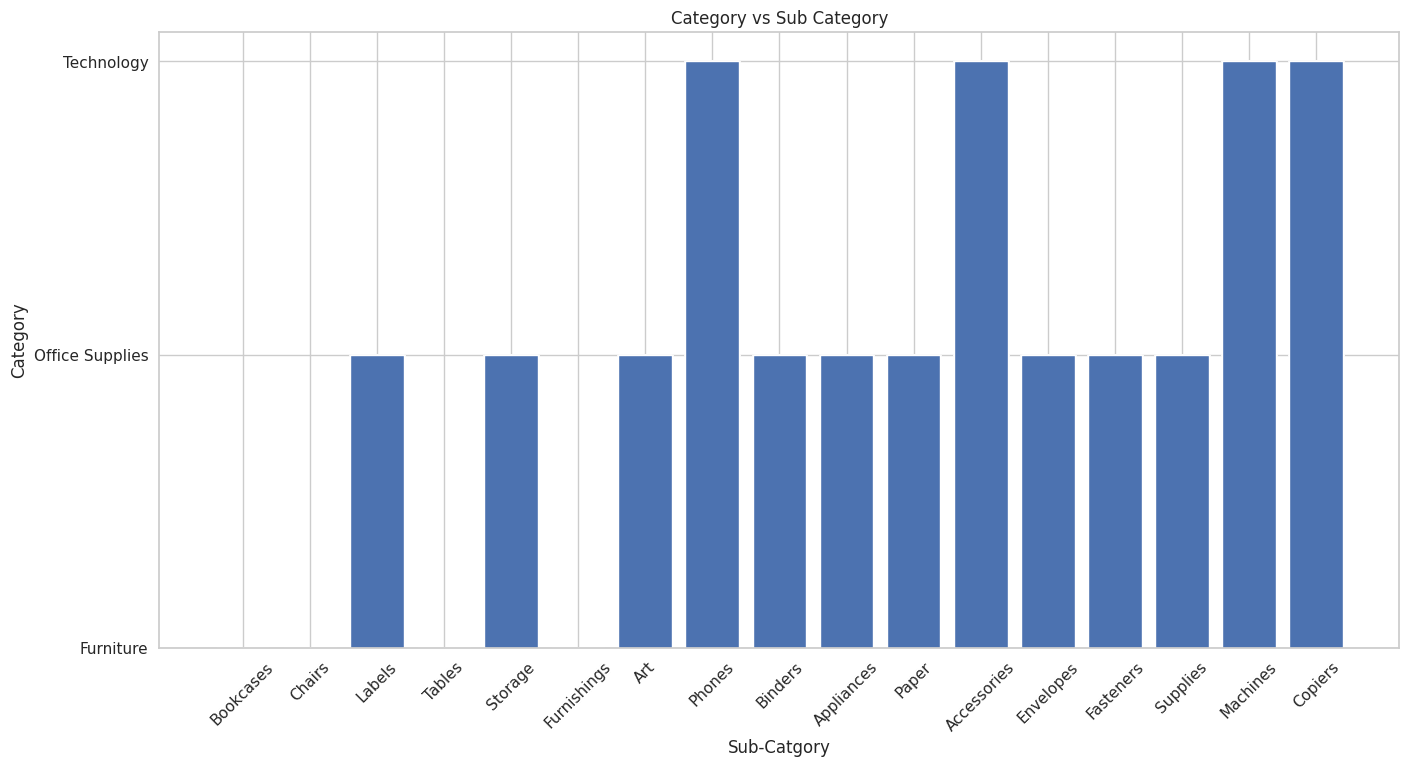

In [94]:
sample1['Category'] = sample1['Category'].astype(str)
sample1['Sub-Category'] = sample1['Sub-Category'].astype(str)

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=sample1)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

Here we plot the numerical data to see its distribution.

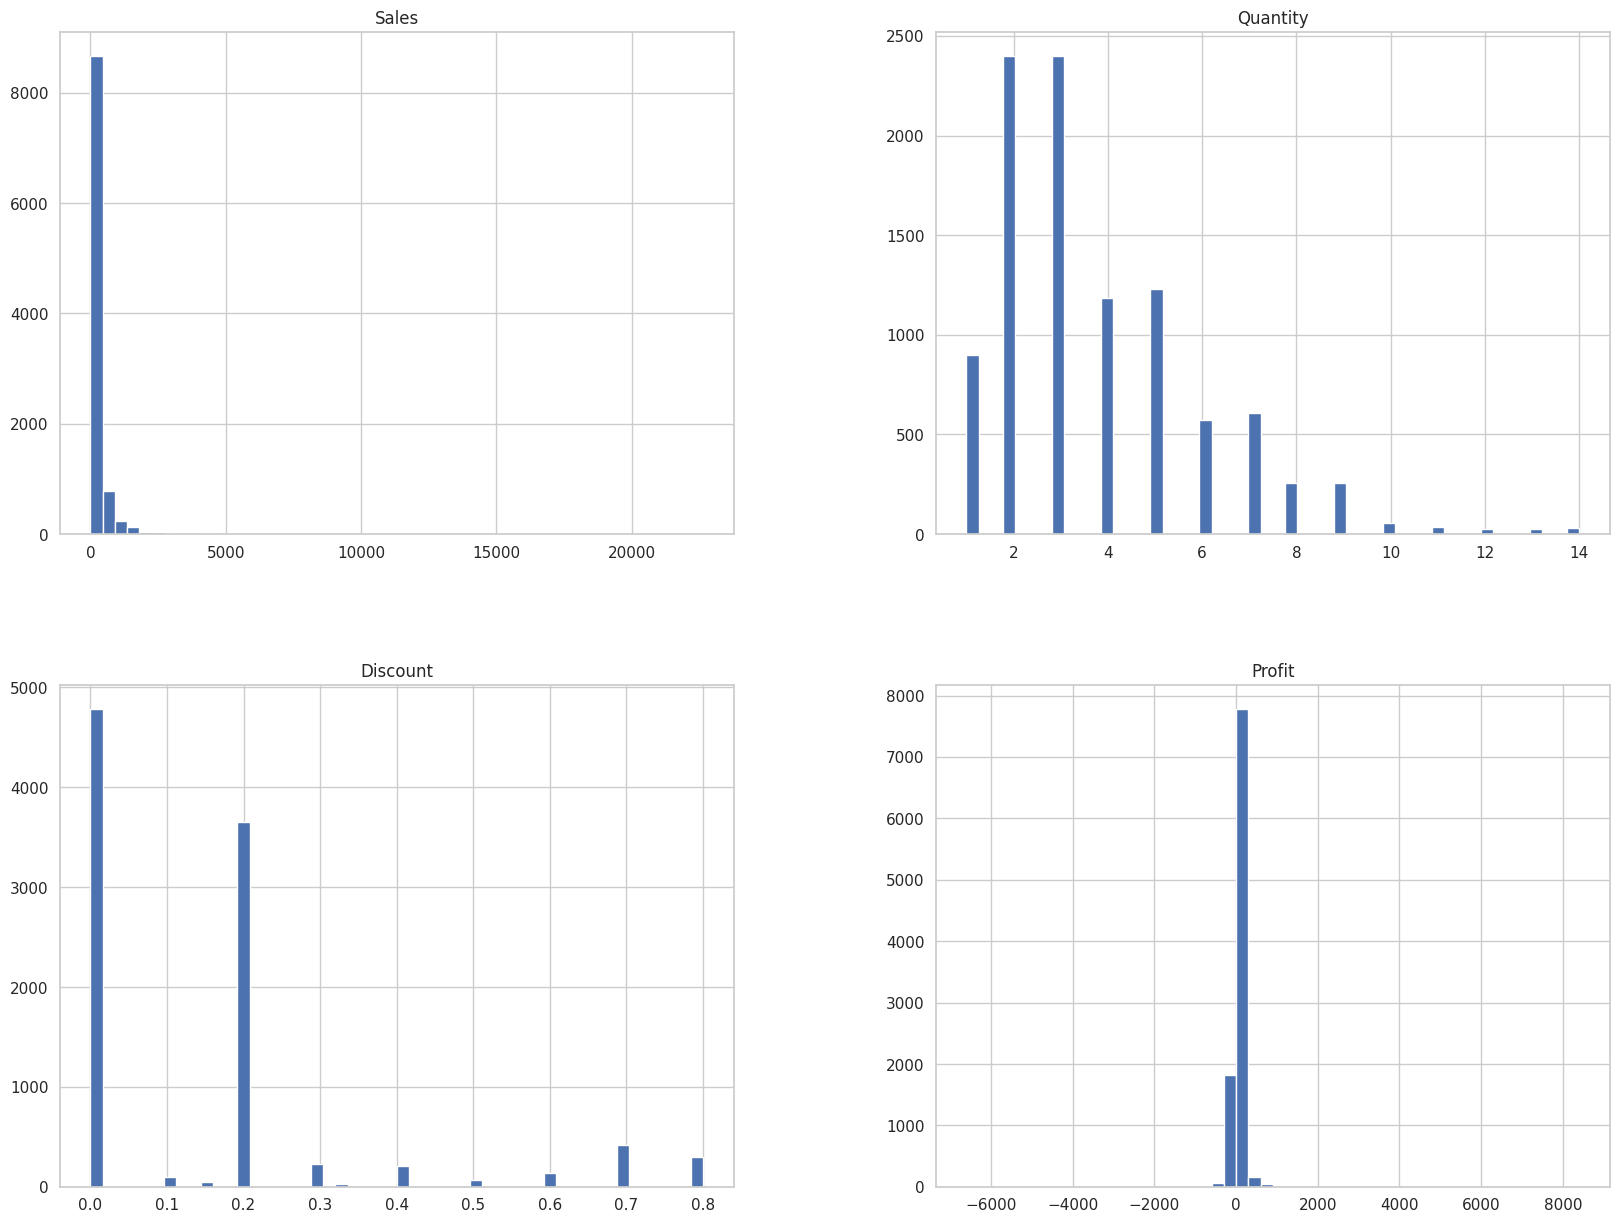

In [95]:
sample1.hist(bins=50,figsize=(20,15))
plt.show();

The most ferequent state with high frequence can be found by bar plot.

In [96]:
sample1['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

Let's make bar plot of all the states.

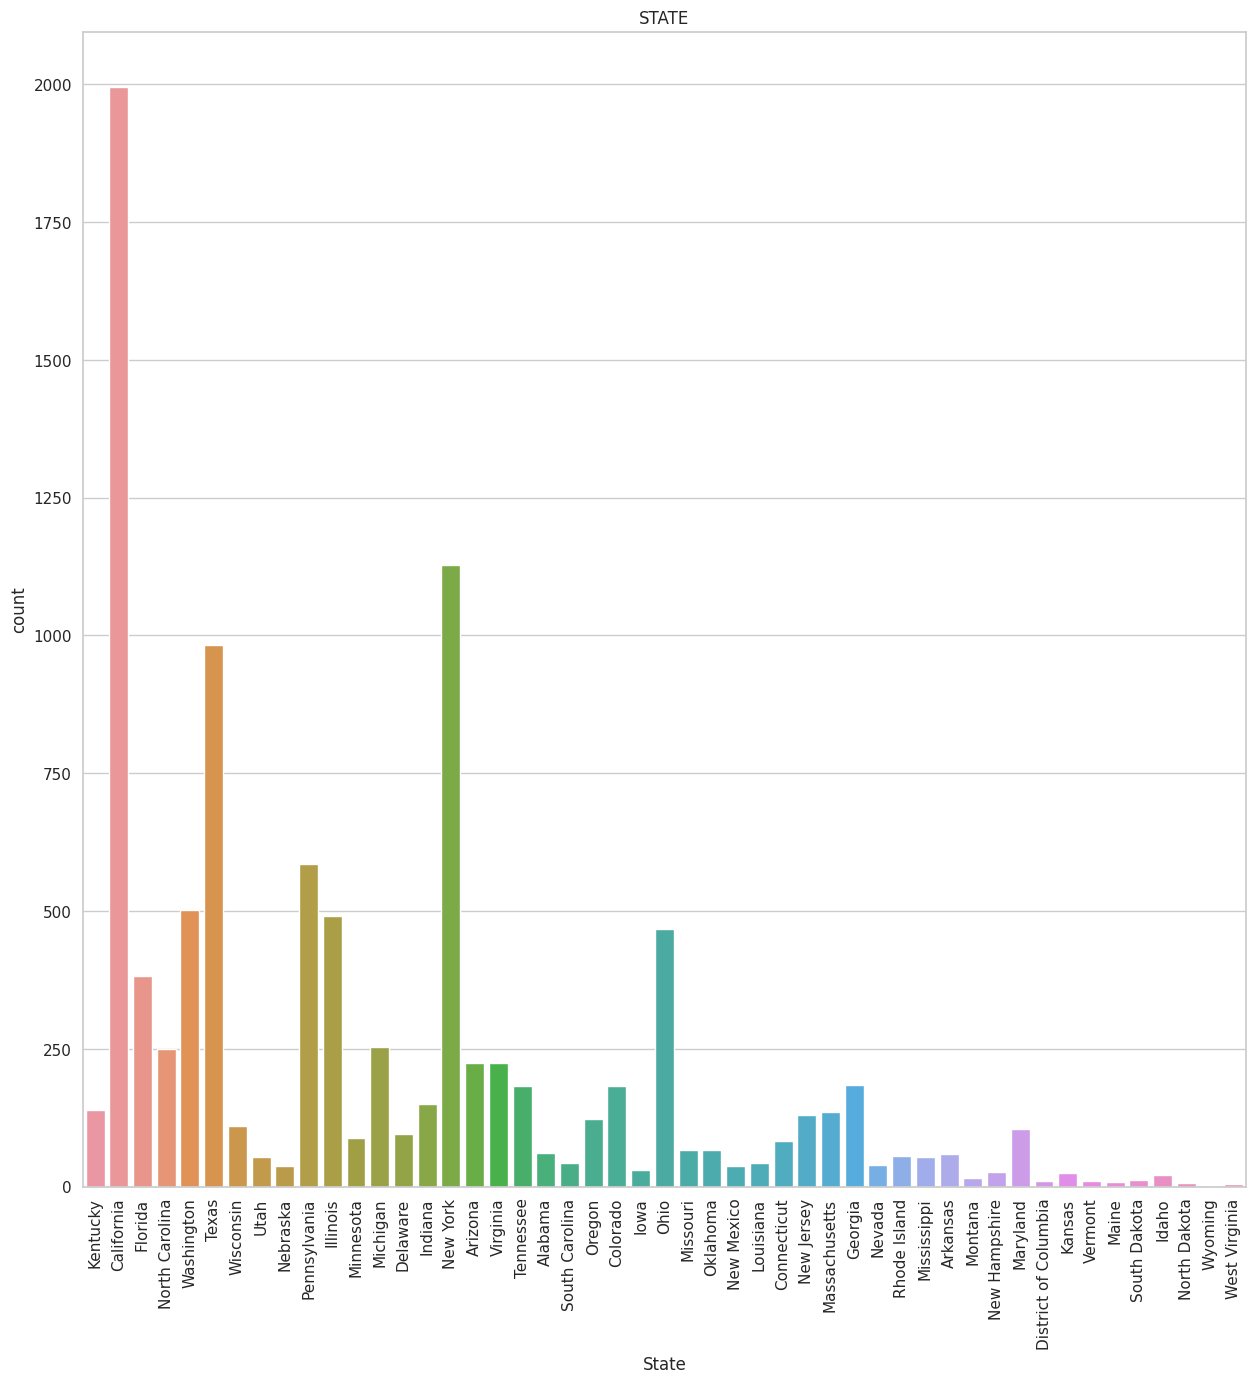

In [97]:
plt.figure(figsize=(15,15))
sns.countplot(x=sample1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

Now we plot to see the profitable and non profitable sub-categories sold.

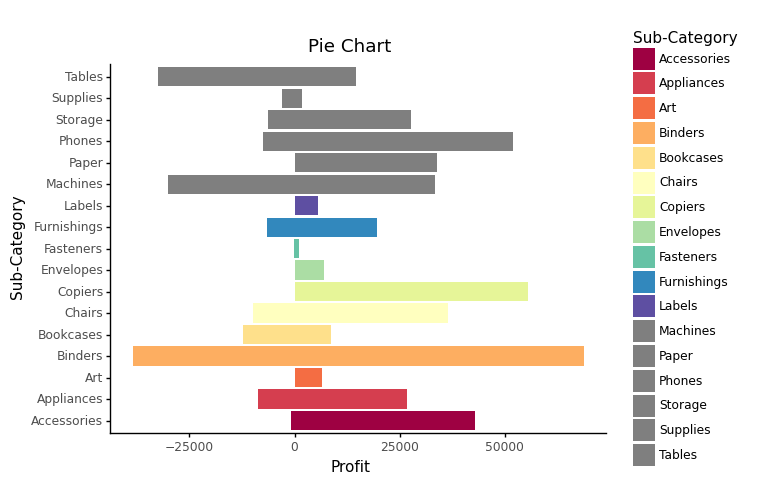

<ggplot: (8772823158789)>

In [98]:
Profit_plot = (ggplot(sample, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

Here we see that,"binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory).

Next,"Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.

Next,Suffering from highest loss is machines.

In this plot we see, what sub-category, is bought most and it's distribution.

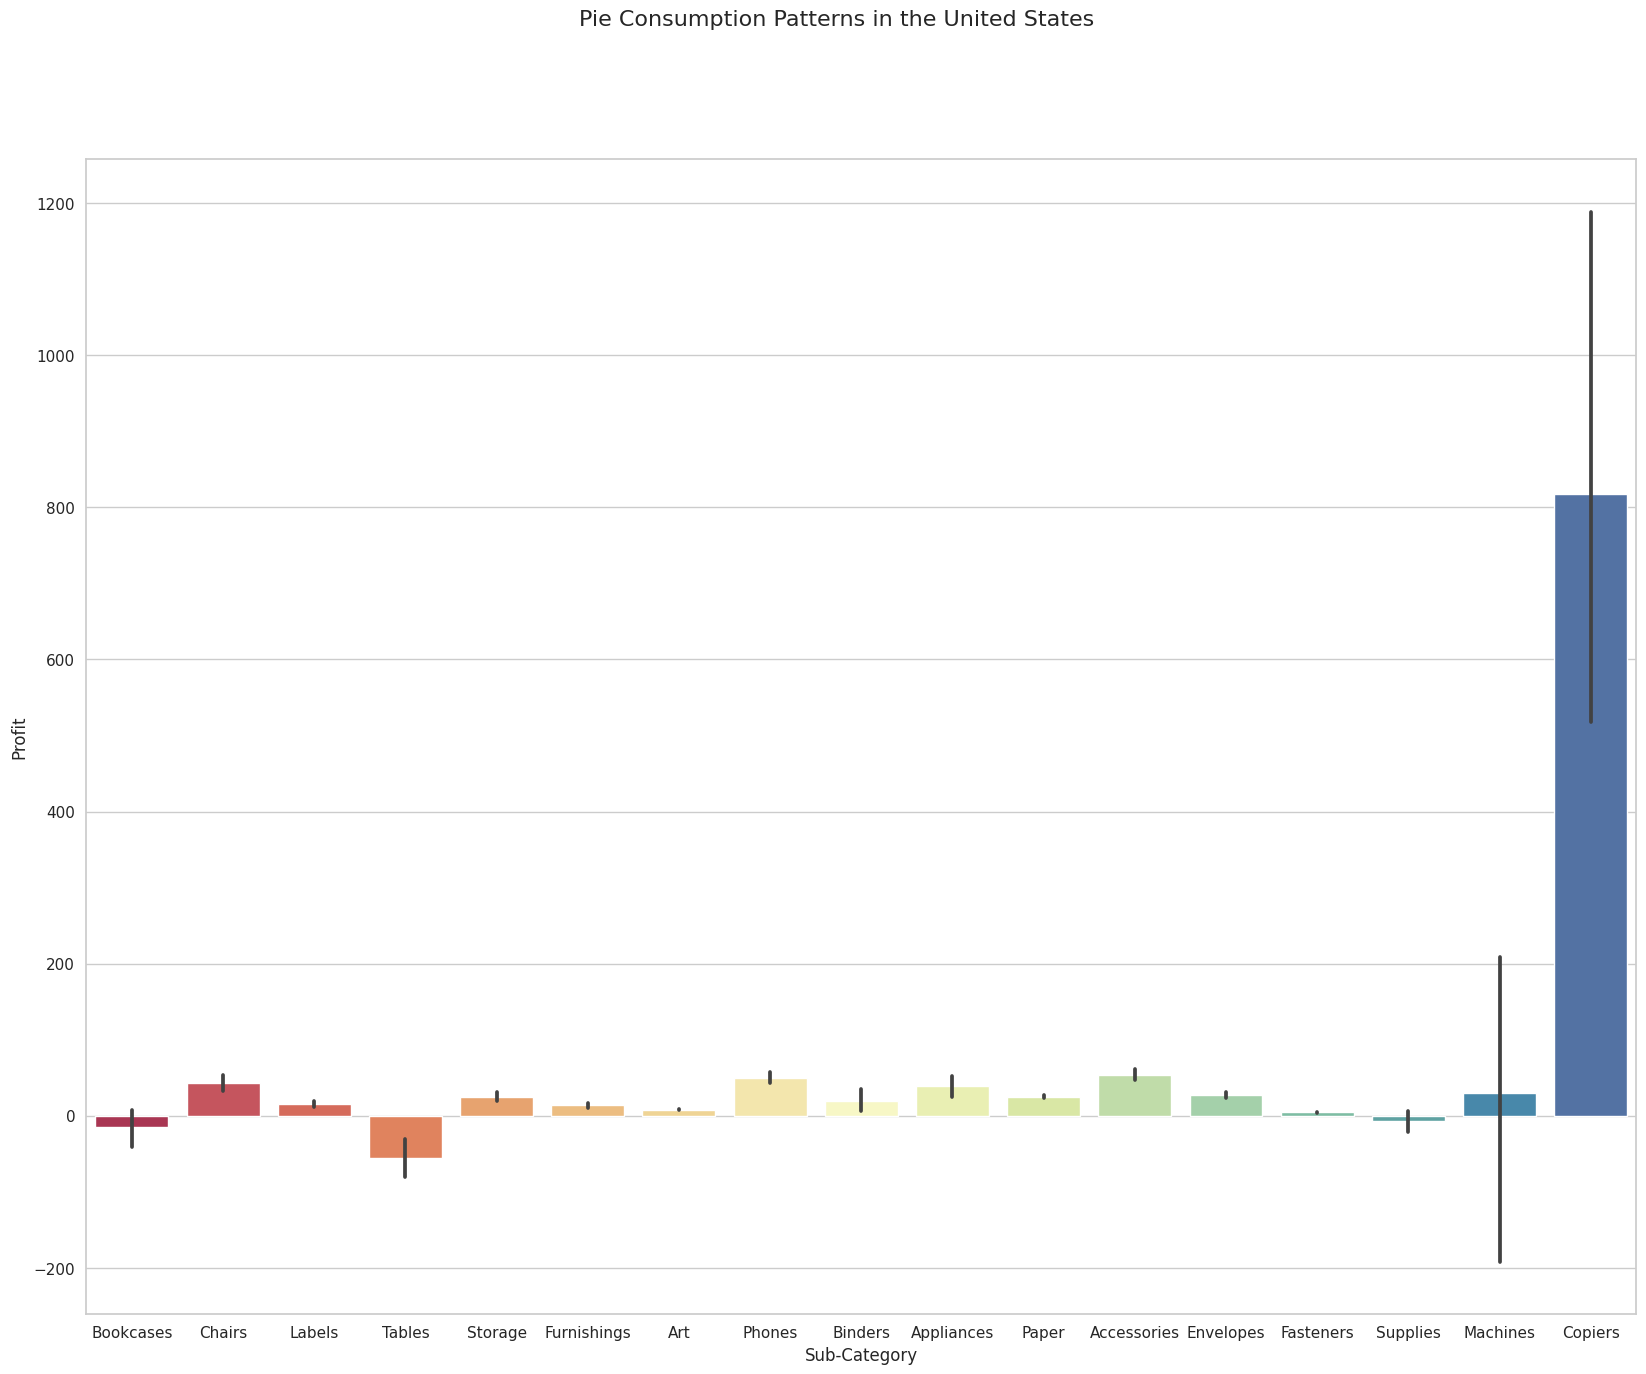

In [99]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit', data=sample, palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)
plt.show()

Here we have a plot of what category is shipped in different shipment styles.

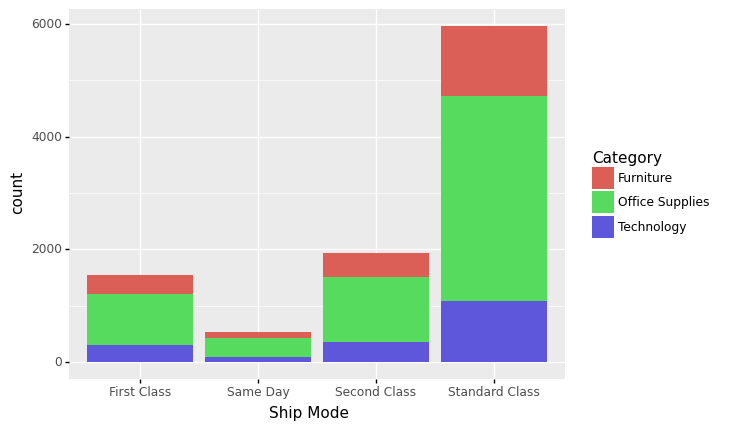

<ggplot: (8772851077169)>

In [100]:
ggplot(sample, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

<function matplotlib.pyplot.show(close=None, block=None)>

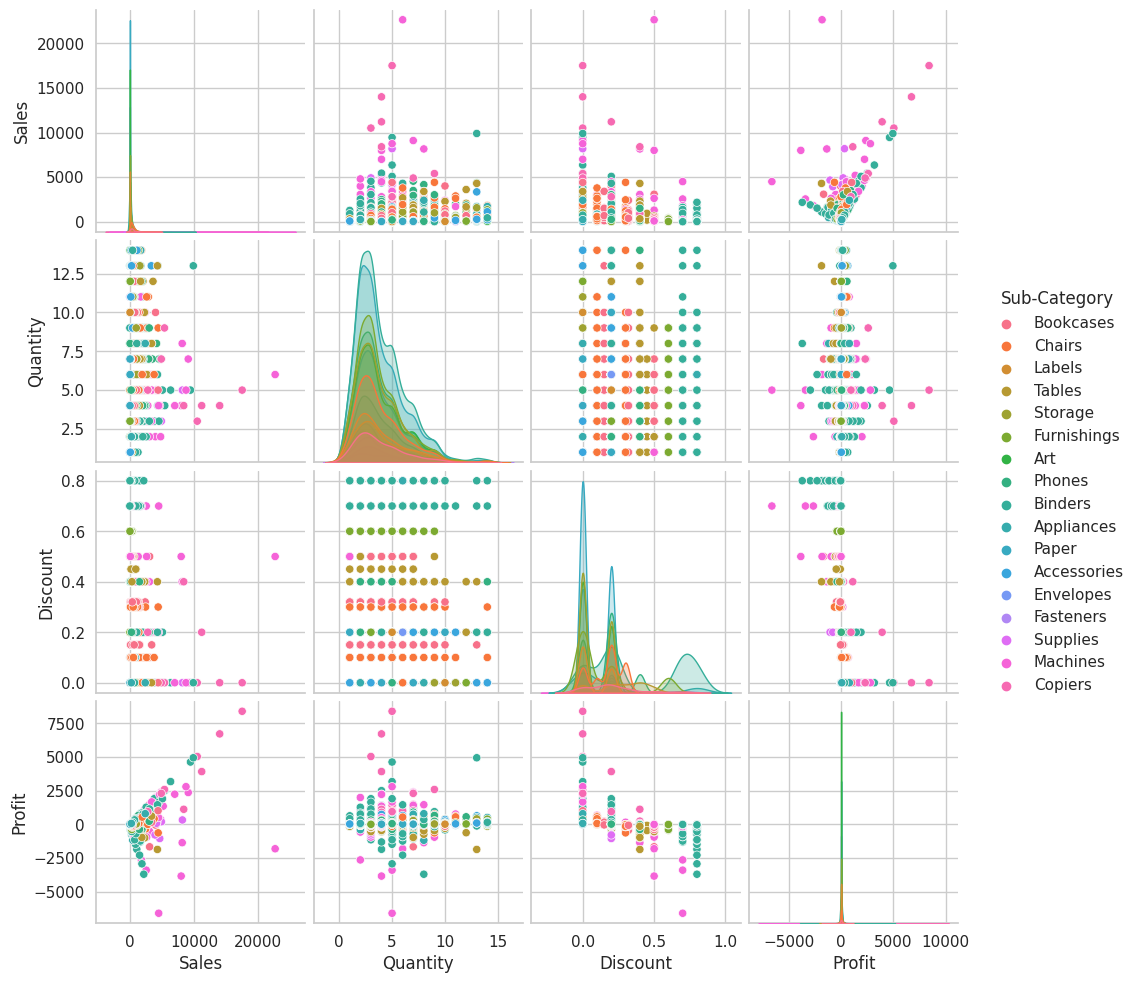

In [101]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')
plt.show

Let's explore more about these outliers 
we'll check Sales from Every Segments

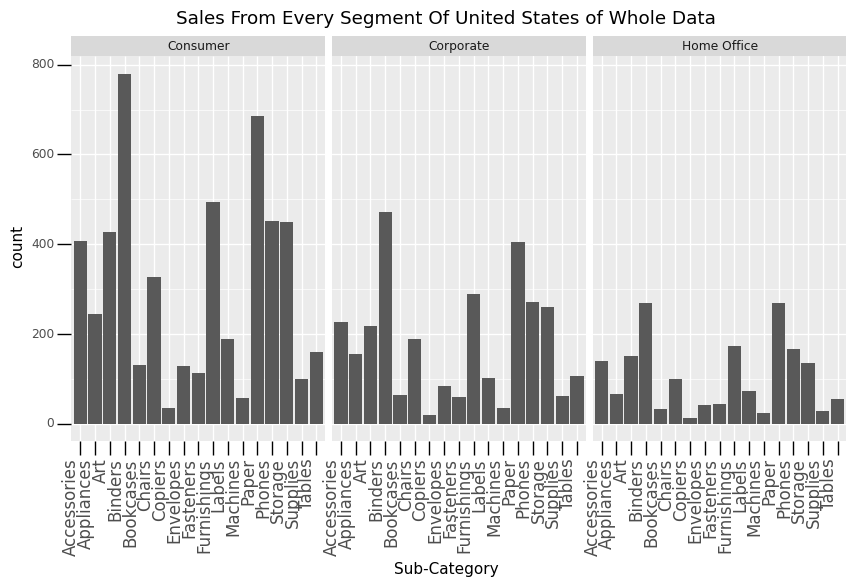

<ggplot: (8772815317697)>

In [102]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

From the Graph we see that "Home Office" segment has less purchased Sub-Categories and in it, the, 
"Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

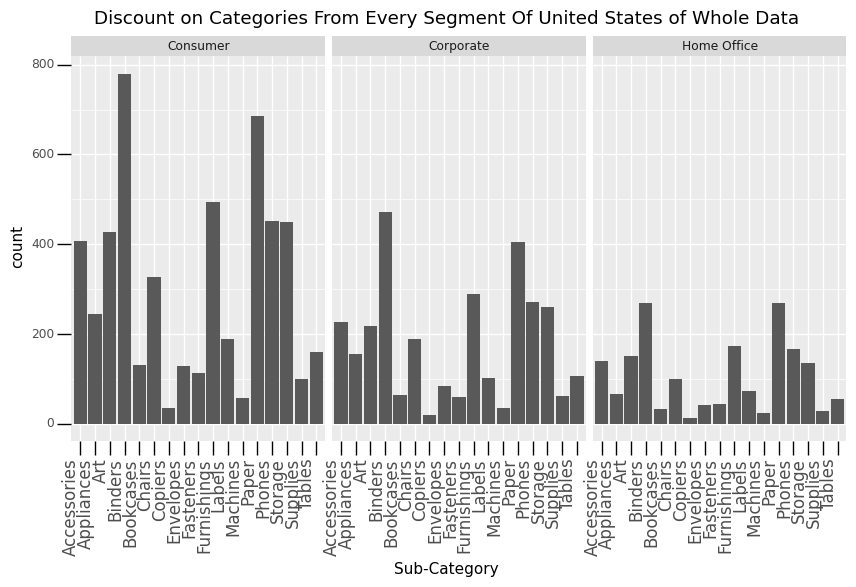

<ggplot: (8772853502593)>

In [103]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

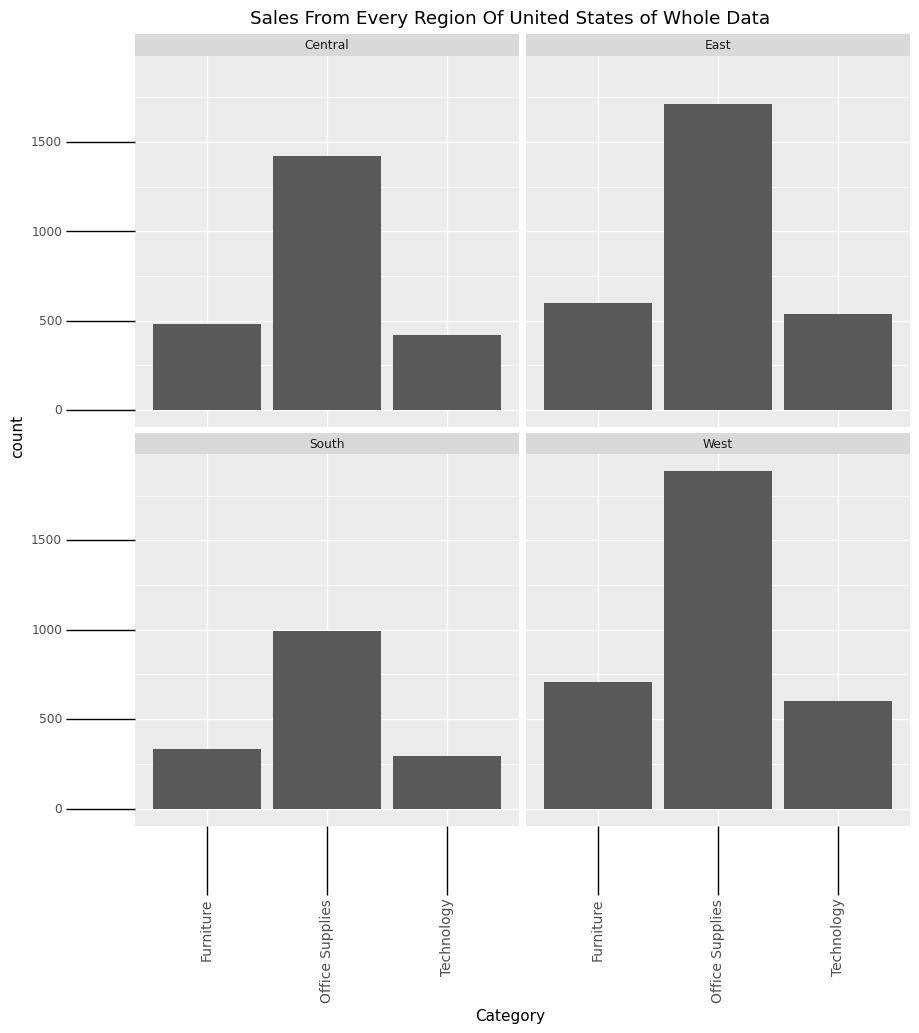

<ggplot: (8772815536377)>

In [104]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sample1, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

In [105]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
sample1['state_code'] = sample1.State.apply(lambda x: state_code[x])

state_data = sample1[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

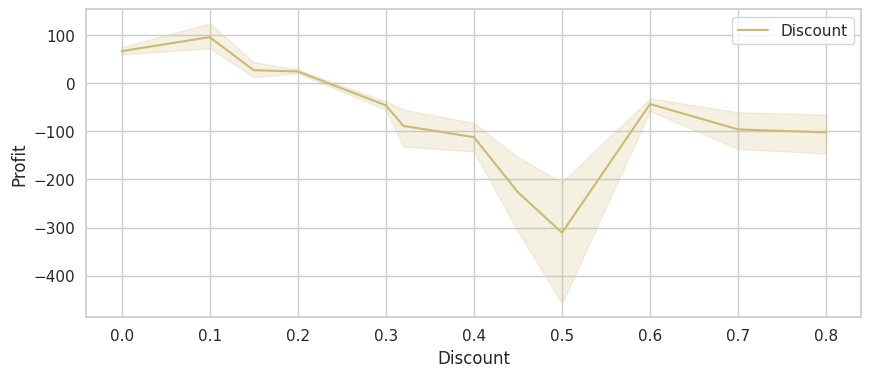

In [106]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=sample1 , color='y',label='Discount')
plt.legend()
plt.show()

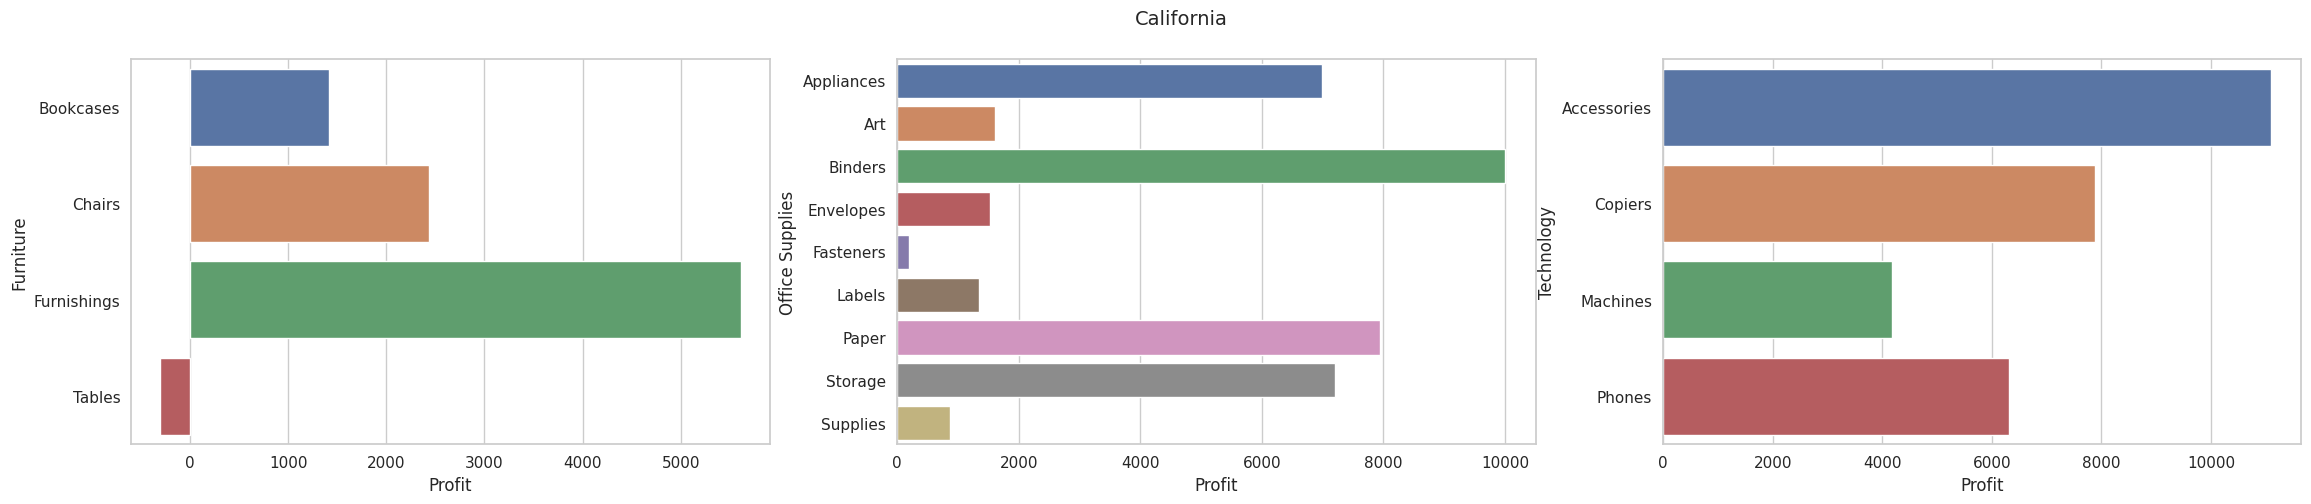

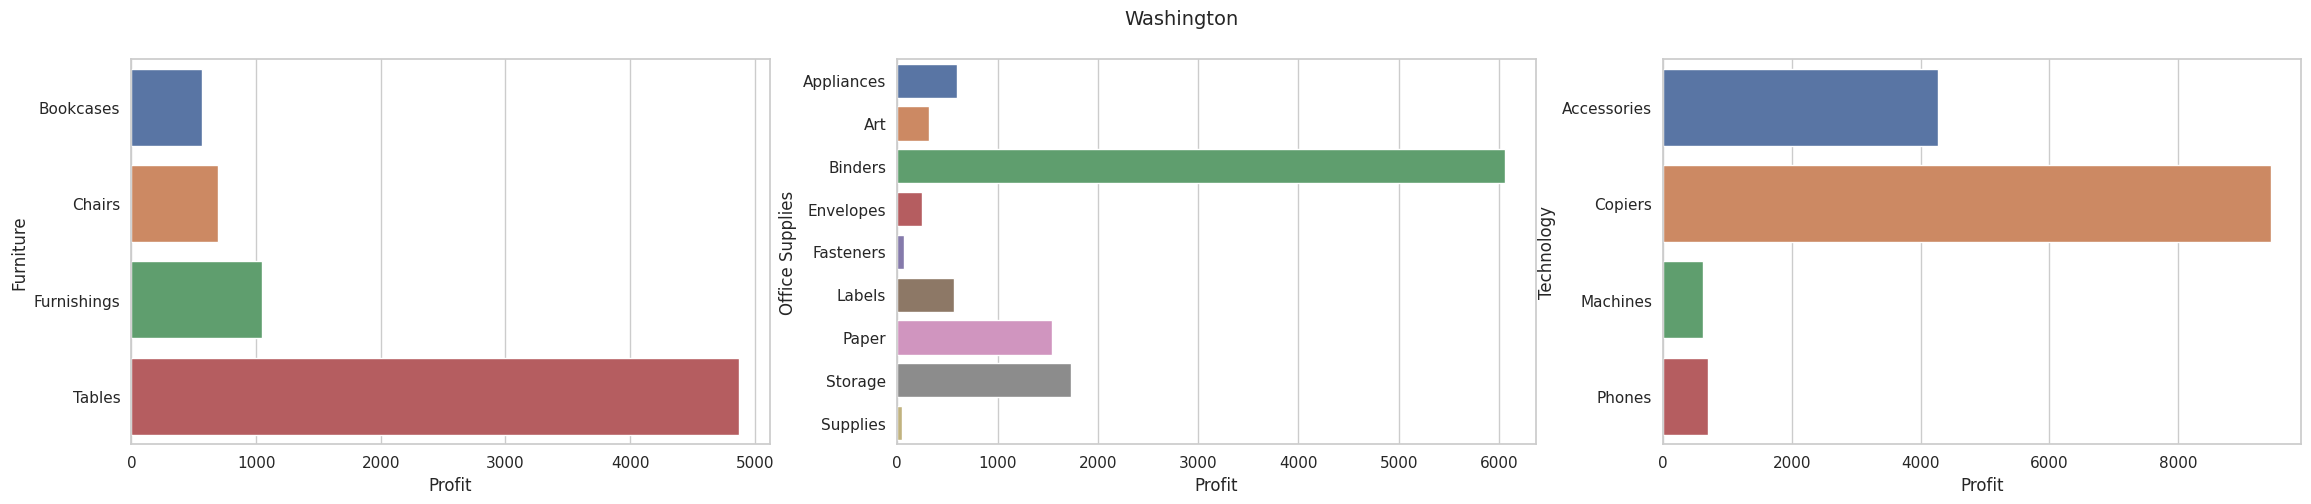

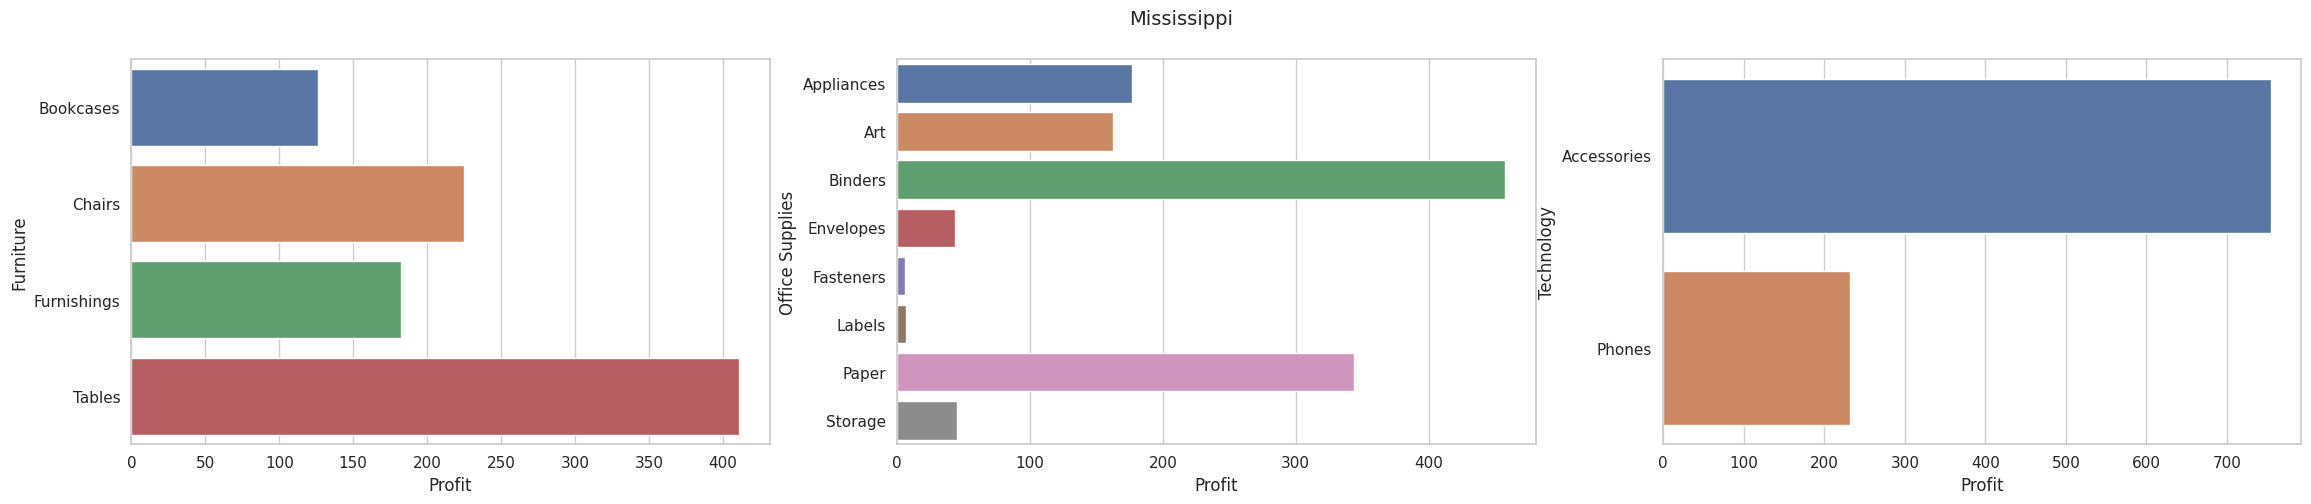

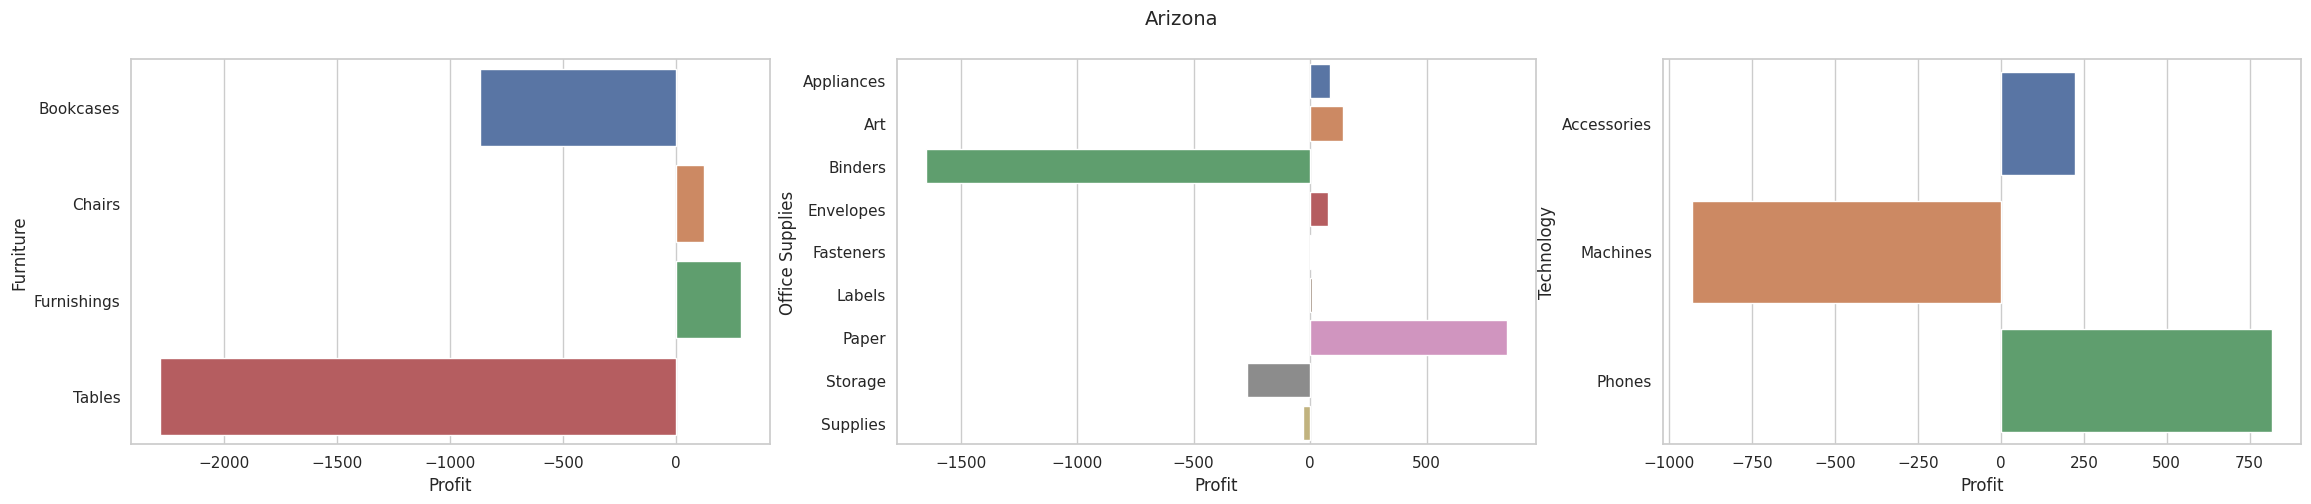

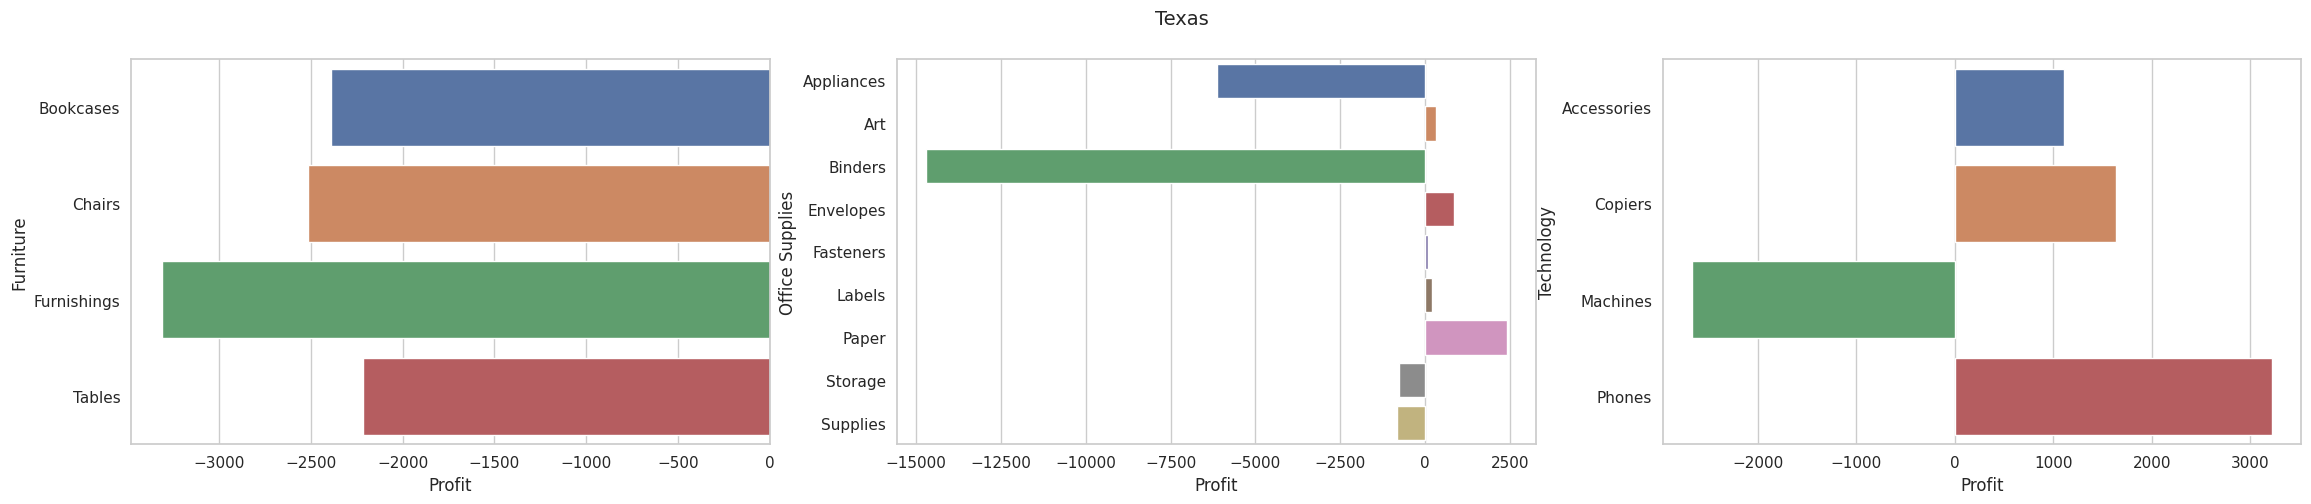

In [107]:
def state_data_viewer(states):
  
    product_data = sample1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)


We can improve in that Sales By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis,or also can Do it throgh neural networks.

One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business